In [1]:
import sys
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
REPORT = True
if REPORT:
    sns.set(font_scale=1.5)

## Load and preprocess data

In [5]:
import data

In [6]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == "04_comprehension_swarm-full") & (raw_df.trial_type == "html-slider-response-with-copout")]

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.
Missing datastring for uid A3V4AW6DGWBHDO:3ERET4BTVNXKIYLUH76KIW70TBHK9X. Status was 1.
Missing datastring for uid A12VDN3TJJCAQQ:33TIN5LC05YF23ABLM7BR4MBRUY9YX. Status was 1.
Missing datastring for uid A11EMV89KB6OCM:3DL65MZB8E3JUW0NX558MRV3F30EC8. Status was 1.
Missing datastring for uid A1HRH92NH49RX2:3Z4GS9HPNWYS90QHJGJR0VB8S6T77C. Status was 1.
Missing datastring for uid A29RCIFHRAZ797:33C7UALJVMMIYSGY45UODLGQ11O18G. Status was 1.
Missing datastring for uid AROOCBM

In [7]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

Dropping 35 dupe results.


In [8]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [9]:
# Convert condition_id to independent features
response_df["agent_is_given"] = response_df["condition_0"] == 0
response_df["agent_is_subject"] = response_df["condition_1"] == 1

In [10]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [11]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [12]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,slider_value,slider_copout,response,image_copout,condition_0,condition_1,condition_2,agent_is_given,agent_is_subject,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
3,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,11532.0,0.0-3.0,2021-08-23 19:33:33.192,04_comprehension_swarm-full,...,NaN,True,NaN,NaN,practice,solid,full,False,False,NaN
4,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,6128.0,0.0-4.0,2021-08-23 19:33:39.325,04_comprehension_swarm-full,...,NaN,True,NaN,NaN,practice,liquid,full,False,False,NaN
5,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,7564.0,0.0-5.0,2021-08-23 19:33:46.893,04_comprehension_swarm-full,...,NaN,True,NaN,NaN,practice,abstract,empty,False,False,NaN
6,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,9300.0,0.0-6.0,2021-08-23 19:33:56.197,04_comprehension_swarm-full,...,87.0,False,NaN,NaN,practice,solid,empty,False,False,0.751921
7,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,4540.0,0.0-7.0,2021-08-23 19:34:00.742,04_comprehension_swarm-full,...,NaN,True,NaN,NaN,practice,abstract,full,False,False,NaN


In [13]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [14]:
N = len(response_df.reset_index().uniqueid.unique())
N

126

### Demo

In [15]:
# again hack -- forgot to put in experiment_id
qualitative_df = raw_df[(raw_df.experiment_id == "04_comprehension_swarm-full") & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

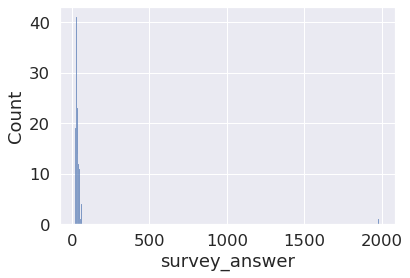

In [16]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [17]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    73
Master's degree      36
Some college         13
High school/GED       4
Ph.D.                 1
Name: survey_answer, dtype: int64

In [18]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    126
No       1
Name: survey_answer, dtype: int64

### Comments

In [19]:
list(qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer)

['nice',
 'None',
 '',
 'GOOD',
 '',
 '',
 '',
 '',
 '',
 'very goods',
 'very interesting',
 'nice',
 'No',
 'good job',
 'No.',
 'very well',
 '',
 '',
 'NICE',
 'Good and easy task',
 'It was a good survey.',
 'good',
 'This was a fascinating and enjoyable study.',
 'This survey is good and usefull me',
 '',
 'very like the survey',
 'none',
 'GOOD',
 'Interested',
 'This survey is very nice and very good ',
 'Good task and good study.',
 '',
 'very interesting',
 'none',
 'nothing',
 '',
 'cool hit!',
 'nothing',
 'good',
 'nice.',
 'LIKE IT',
 'good study',
 'very nice study',
 'none',
 'none',
 '',
 'none',
 '',
 'na',
 'good',
 'LIKE IT',
 '',
 'very interesting',
 'Good experiment',
 '',
 '',
 'It was good',
 '',
 '',
 'Enjoyed the survey.',
 '',
 '',
 '',
 'noe',
 '',
 'nice survey',
 'none',
 'None',
 'None',
 '',
 "I'm brimming with gratitude.  ",
 '',
 'No',
 '',
 'good',
 '',
 'none',
 '',
 'good',
 'interesting study.',
 'good survey',
 '',
 '',
 '',
 'nice',
 'Almost Per

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

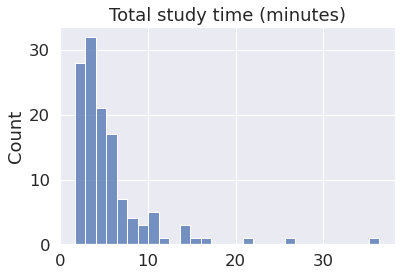

In [20]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [21]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    5.650290
std     4.711848
Name: rt, dtype: float64

### Response times

In [22]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

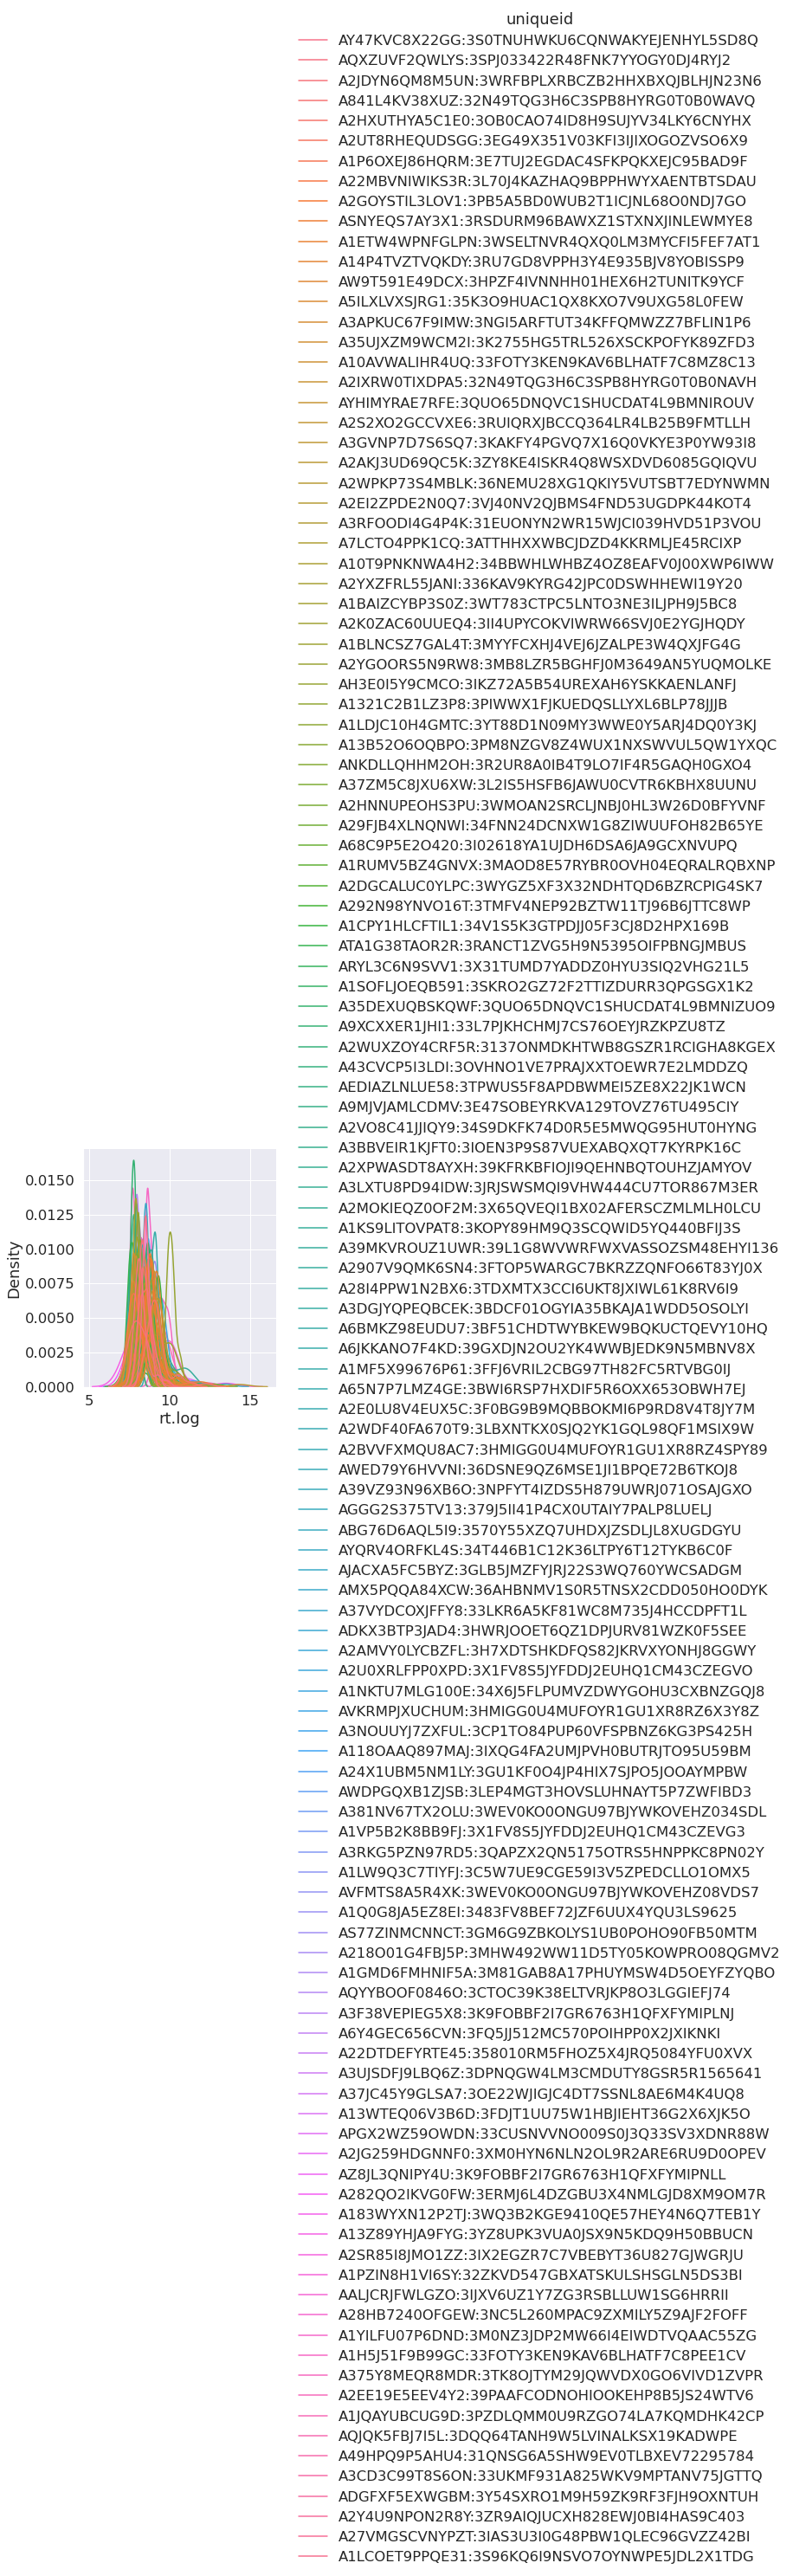

In [23]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

In [24]:
# sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
# plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

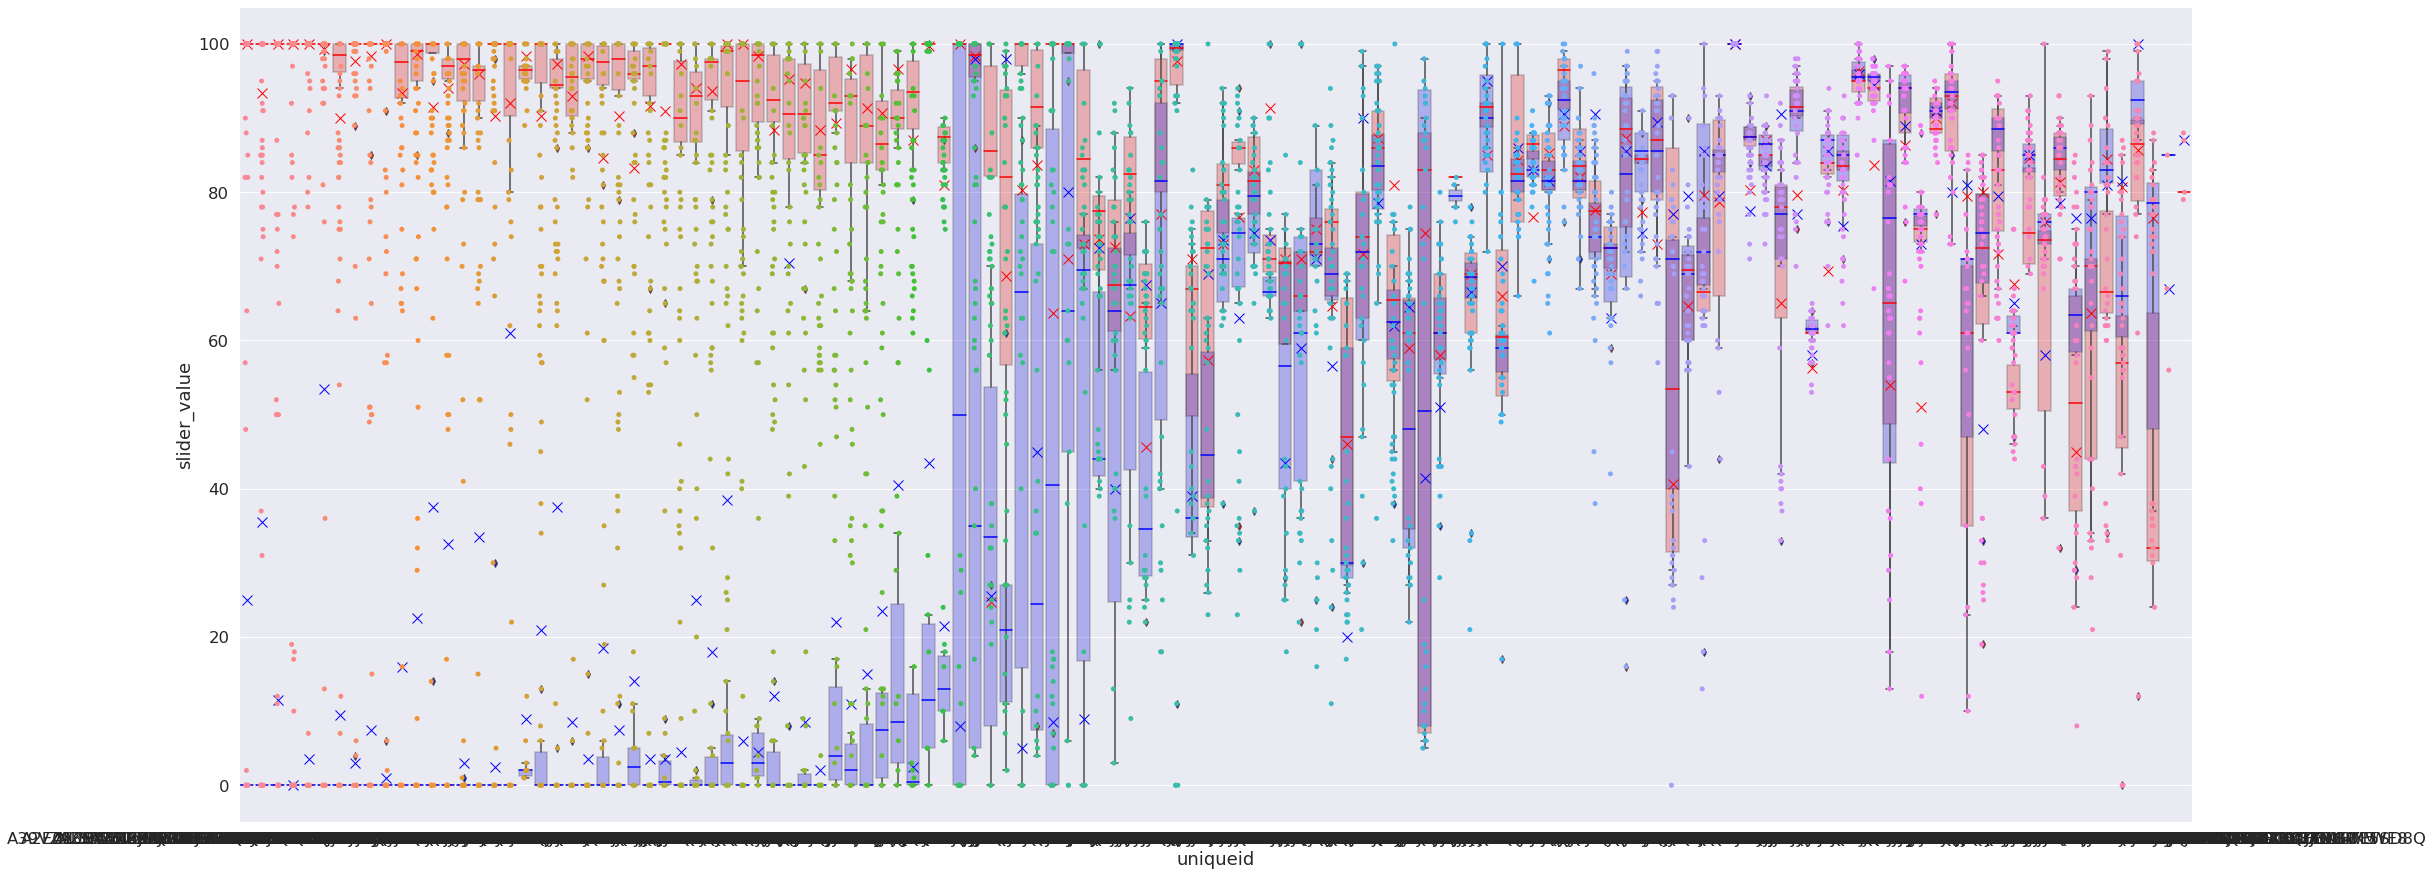

In [25]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(35, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

In [26]:
practice_df = response_df[response_df.condition_0 == "practice"]
practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)

/tmp/ipykernel_113/3679604798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
/tmp/ipykernel_113/3679604798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)


In [27]:
# Ignore evaluating practice items which retrospectively don't seem like good practice items...
PRACTICE_IGNORE = {"solidempty", "abstractempty"}

practice_df = practice_df[~practice_df.practice_id.isin(PRACTICE_IGNORE)]

#### Practice failures by item

In [28]:
practice_df.groupby("practice_id").match.mean()

practice_id
abstractfull    0.841270
liquidfull      0.888889
solidfull       0.904762
Name: match, dtype: float64

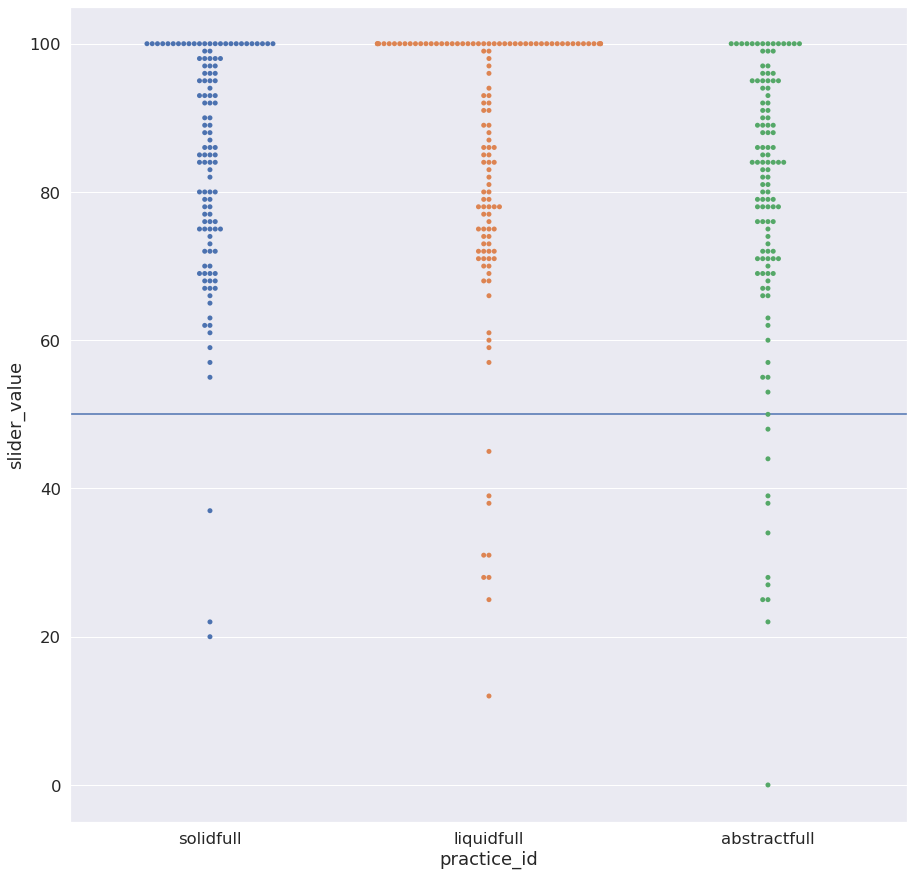

In [29]:
plt.subplots(figsize=(15,15))
sns.swarmplot(data=practice_df.reset_index(), x="practice_id", y="slider_value")
plt.axhline(50)

#### Practice copouts

In [30]:
practice_df.groupby("practice_id").slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,mean,count
practice_id,,
solidfull,0.071429,126
abstractfull,0.063492,126
liquidfull,0.039683,126


### Fillers

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:xlabel='t'>

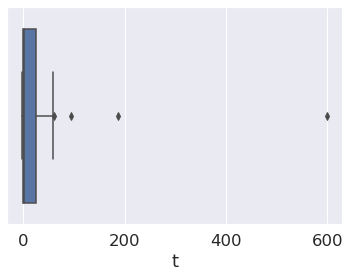

In [31]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [32]:
filler_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
A2MOKIEQZ0OF2M:3X65QVEQI1BX02AFERSCZMLMLH0LCU,-2.015044,0.071570
A1LCOET9PPQE31:3S96KQ6I9NSVO7OYNWPE5JDL2X1TDG,-1.874802,0.090292
A2EE19E5EEV4Y2:39PAAFCODNOHIOOKEHP8B5JS24WTV6,-1.727357,0.114803
A10T9PNKNWA4H2:34BBWHLWHBZ4OZ8EAFV0J00XWP6IWW,-1.720933,0.115998
A1LW9Q3C7TIYFJ:3C5W7UE9CGE59I3V5ZPEDCLLO1OMX5,-1.490018,0.167069
A1VP5B2K8BB9FJ:3X1FV8S5JYFDDJ2EUHQ1CM43CZEVG3,-1.482655,0.168980
A5ILXLVXSJRG1:35K3O9HUAC1QX8KXO7V9UXG58L0FEW,-1.381426,0.197231
A282QO2IKVG0FW:3ERMJ6L4DZGBU3X4NMLGJD8XM9OM7R,-1.194343,0.259904
A3F38VEPIEG5X8:3K9FOBBF2I7GR6763H1QFXFYMIPLNJ,-1.192079,0.260751


#### Filler copouts

In [33]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "sum", "count"]).sort_values("mean", ascending=False)

,,mean,sum,count
item_id,condition_1,,,
3.0,empty,0.055556,7,126
1.0,empty,0.047619,6,126
6.0,full,0.047619,6,126
4.0,empty,0.039683,5,126
5.0,empty,0.039683,5,126
7.0,full,0.039683,5,126
8.0,full,0.039683,5,126
10.0,full,0.039683,5,126
11.0,full,0.039683,5,126


#### Filler failures by item

In [34]:
filler_df = response_df[response_df.condition_0 == "filler"]
filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)

/tmp/ipykernel_113/2652486730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)


In [35]:
filler_df.groupby(["condition_1", "item_id"]).match.mean()

condition_1  item_id
empty        0.0        0.492063
             1.0        0.476190
             2.0        0.484127
             3.0        0.460317
             4.0        0.444444
             5.0        0.500000
full         6.0        0.880952
             7.0        0.880952
             8.0        0.904762
             9.0        0.912698
             10.0       0.873016
             11.0       0.880952
Name: match, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


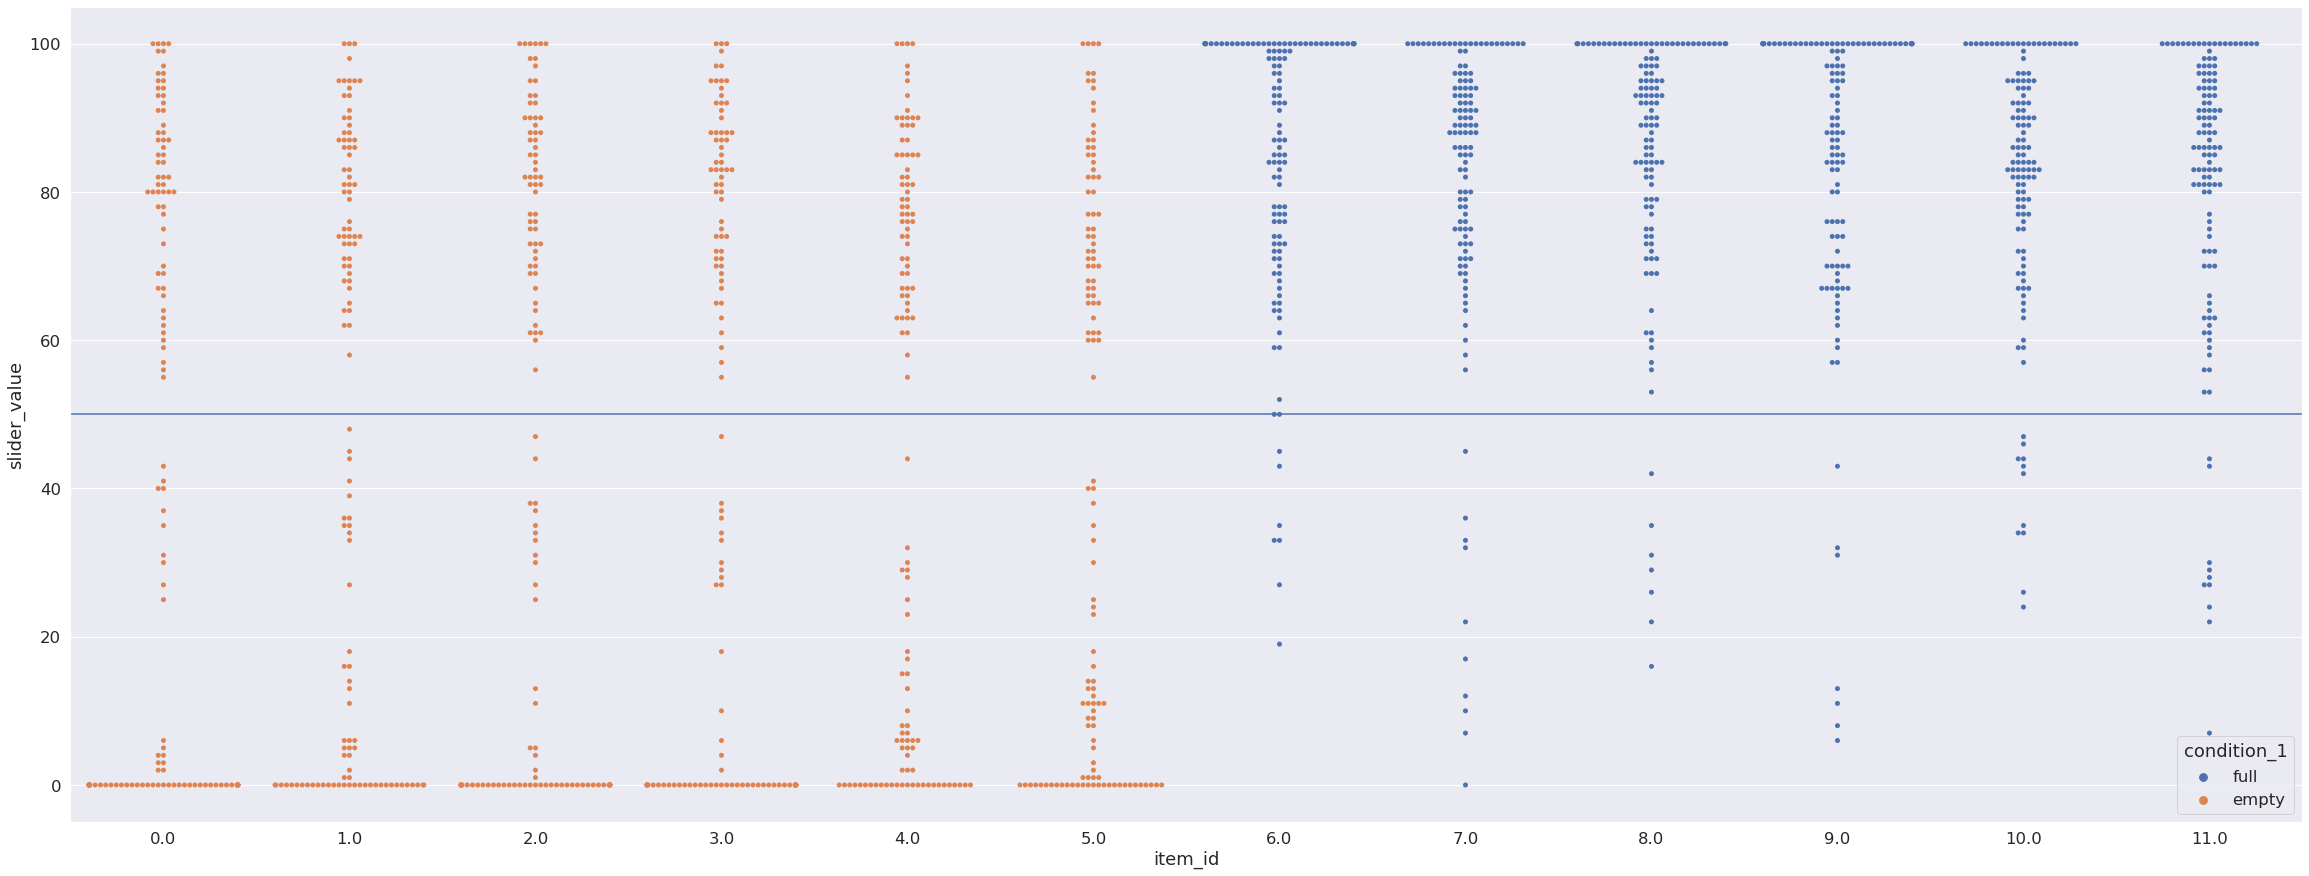

In [36]:
plt.subplots(figsize=(40,15))
# sns.barplot(data=filler_df.reset_index(), x="condition_1", hue="item_id", y="slider_value")
sns.swarmplot(data=filler_df.reset_index(), hue="condition_1", x="item_id", y="slider_value")
plt.axhline(50)

## Final data processing

In [37]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [38]:
practice_drops = set(practice_df.groupby("uniqueid").filter(lambda r: r.match.mean() < 0.66).index.get_level_values("uniqueid"))
drop_pct = np.round(len(practice_drops) / N * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops))
exp_items = exp_items.drop(practice_drops, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / N * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

10 subjects (7.9%) disqualified and dropped due to failed practice.
	AMX5PQQA84XCW:36AHBNMV1S0R5TNSX2CDD050HO0DYK
	ASNYEQS7AY3X1:3RSDURM96BAWXZ1STXNXJINLEWMYE8
	A2HNNUPEOHS3PU:3WMOAN2SRCLJNBJ0HL3W26D0BFYVNF
	A1GMD6FMHNIF5A:3M81GAB8A17PHUYMSW4D5OEYFZYQBO
	AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q
	AYQRV4ORFKL4S:34T446B1C12K36LTPY6T12TYKB6C0F
	ABG76D6AQL5I9:3570Y55XZQ7UHDXJZSDLJL8XUGDGYU
	A2JG259HDGNNF0:3XM0HYN6NLN2OL9R2ARE6RU9D0OPEV
	A2Y4U9NPON2R8Y:3ZR9AIQJUCXH828EWJ0BI4HAS9C403
	A29FJB4XLNQNWI:34FNN24DCNXW1G8ZIWUUFOH82B65YE
71 subjects (56.3%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	A10T9PNKNWA4H2:34BBWHLWHBZ4OZ8EAFV0J00XWP6IWW
	A118OAAQ897MAJ:3IXQG4FA2UMJPVH0BUTRJTO95U59BM
	A1321C2B1LZ3P8:3PIWWX1FJKUEDQSLLYXL6BLP78JJJB
	A13Z89YHJA9FYG:3YZ8UPK3VUA0JSX9N5KDQ9H50BBUCN
	A14P4TVZTVQKDY:3RU7GD8VPPH3Y4E935BJV8YOBISSP9
	A1BAIZCYBP3S0Z:3WT783CTPC5LNTO3NE3ILJPH9J5BC8
	A1ETW4WPNFGLPN:3WSELTNVR4QXQ0LM3MYCFI5FEF7AT1
	A1GMD6FMHNIF5A:3M81GAB8A

In [41]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

54 subjects remaining.


### Merge in materials

In [42]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [43]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?", "A animate?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Filter out items which were dropped in later materials iterations

In [44]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, swarm-004-given.


### Export

In [45]:
merged_df.to_csv("merged_df.csv")

## Basic visualization: construction meaning

In [46]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "A concrete?", "A countable?", "A animate?"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

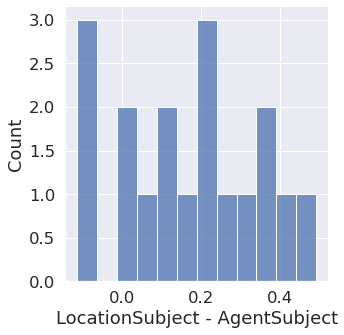

In [47]:
sns.displot(item_differences, bins=12)

In [48]:
item_differences.sort_values(ascending=False)

item_id  A             V        L           A concrete?  A countable?  A animate?
24.0     frogs         hopp     swamp       True         True          True          0.492346
56.0     tadpoles      swimm    pond        True         True          True          0.428218
64.0     worms         wriggl   bucket      True         True          True          0.377604
18.0     birds         flutter  courtyard   True         True          True          0.365100
19.0     bubbles       foam     tub         True         True          False         0.306082
8.0      cockroaches   creep    cave        True         True          True          0.285193
30.0     fear          prickl   fingertips  False        False         False         0.234320
20.0     fireflies     glimmer  backyard    True         True          True          0.211481
17.0     debris        flow     river       True         False         False         0.207937
39.0     sewage        runn     street      True         False         F

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'cockroaches creep'),
  Text(1, 0, 'sewage runn'),
  Text(2, 0, 'frogs hopp'),
  Text(3, 0, 'fireflies glimmer'),
  Text(4, 0, 'birds flutter'),
  Text(5, 0, 'worms wriggl'),
  Text(6, 0, 'lights glow'),
  Text(7, 0, 'terror cours'),
  Text(8, 0, 'bubbles foam'),
  Text(9, 0, 'excitement puls'),
  Text(10, 0, 'tadpoles swimm'),
  Text(11, 0, 'debris flow'),
  Text(12, 0, 'excitement crackl'),
  Text(13, 0, 'trepidation shak'),
  Text(14, 0, 'people bustl'),
  Text(15, 0, 'fear prickl'),
  Text(16, 0, 'anticipation tingl'),
  Text(17, 0, 'energy humm')])

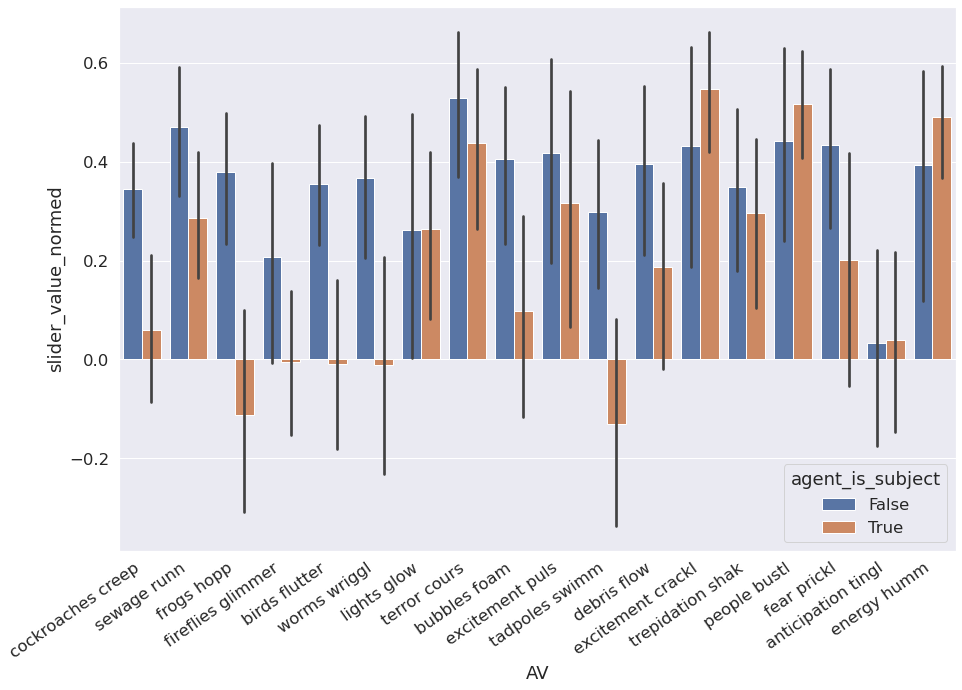

In [49]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df.reset_index(), x="AV", hue="agent_is_subject", y="slider_value_normed")
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

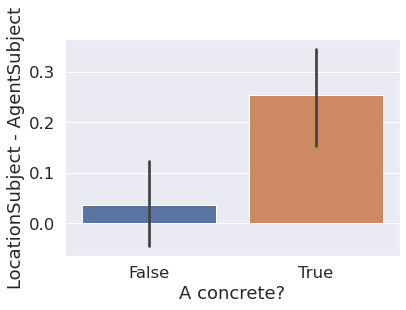

In [50]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A countable?', ylabel='LocationSubject - AgentSubject'>

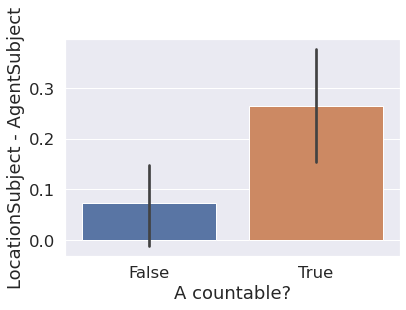

In [51]:
sns.barplot(data=item_differences.reset_index(), x="A countable?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A animate?', ylabel='LocationSubject - AgentSubject'>

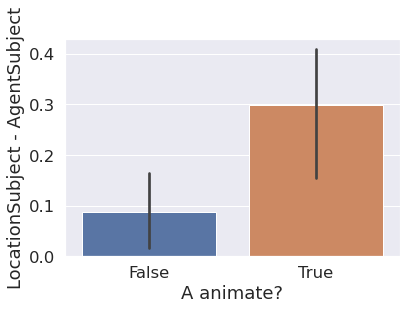

In [52]:
sns.barplot(data=item_differences.reset_index(), x="A animate?", y="LocationSubject - AgentSubject")

#### Bootstrap check

In [53]:
def eval_bootstrap(rows):
    pos = [value for cond, value in rows if cond]
    neg = [value for cond, value in rows if not cond]
    if not pos or not neg:
        return None
    return np.mean(neg) - np.mean(pos)

def item_bootstrap(rows):
    rows = rows[~rows.slider_copout]
    bootstrap = sns.algorithms.bootstrap(rows[["agent_is_subject", "slider_value_normed"]],
                                         n_boot=10000, func=eval_bootstrap)
    # Drop samples where there were no positive or negative classes
    bootstrap = [x for x in bootstrap if x is not None]
    
    pcts = np.percentile(bootstrap, [0.025, 0.975])
    return pd.Series({"low": pcts[0], "high": pcts[1]})

# item_bootstrap_df = merged_df.groupby("item_id").apply(item_bootstrap)
# item_bootstrap_df

In [54]:
# item_bootstrap_df = \
#     pd.merge(item_bootstrap_df, materials_df.loc[latest_materials][["A", "V", "AV", "L"]],
#              left_index=True, right_index=True).sort_values("low", ascending=False)

In [55]:
# item_bootstrap_df.sort_values("low", ascending=False)

In [56]:
# plt.subplots(figsize=(15, 15))
# sns.barplot(
#     data=item_bootstrap_df.reset_index().melt(id_vars=["item_id", "AV", "L"], value_vars=["low", "high"]),
#     x="AV", y="value", hue="variable")
# plt.xticks(rotation=35, ha="right")

### Copouts

In [57]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [58]:
copouts = merged_df.groupby(["materials_id", "item_id", "agent_is_given", "agent_is_subject"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.sum(level=["item_id", "agent_is_given", "agent_is_subject"])
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

/tmp/ipykernel_113/93911653.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  copouts = copouts.sum(level=["item_id", "agent_is_given", "agent_is_subject"])


slider_copout                            sum  count      mean
item_id agent_is_given agent_is_subject                      
25.0    True           False               2     16  0.125000
8.0     False          False               1     10  0.100000
56.0    False          False               1     13  0.076923
22.0    False          True                1     13  0.076923
30.0    True           False               1     13  0.076923
...                                      ...    ...       ...
20.0    True           False               0     13  0.000000
22.0    False          False               0     12  0.000000
        True           False               0     14  0.000000
                       True                0     15  0.000000
64.0    True           True                0     15  0.000000

[72 rows x 3 columns]

<AxesSubplot:xlabel='A', ylabel='slider_copout'>

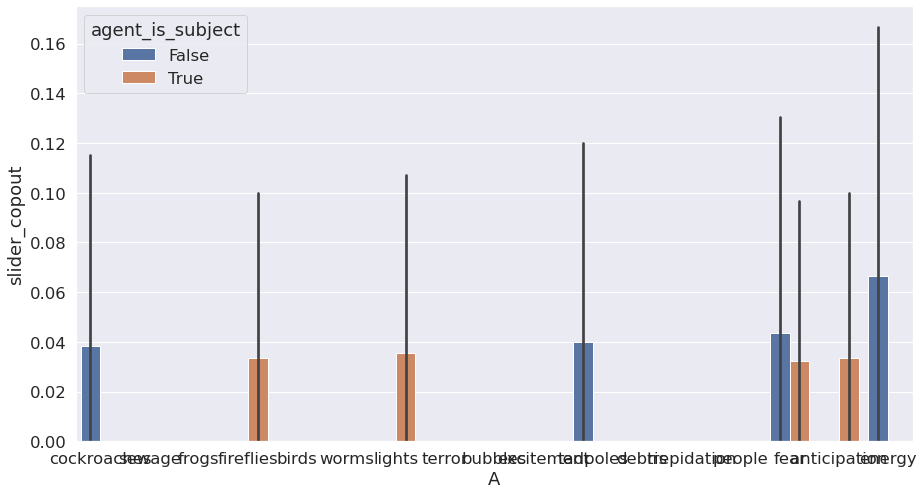

In [59]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="A", y="slider_copout", hue="agent_is_subject")

<AxesSubplot:xlabel='A concrete?', ylabel='slider_copout'>

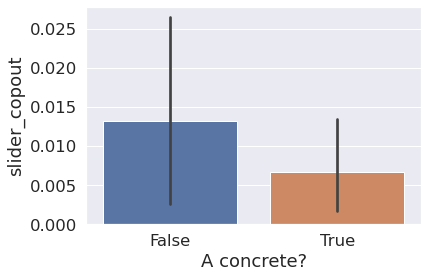

In [60]:
sns.barplot(data=merged_df, x="A concrete?", y="slider_copout")

<AxesSubplot:xlabel='A countable?', ylabel='slider_copout'>

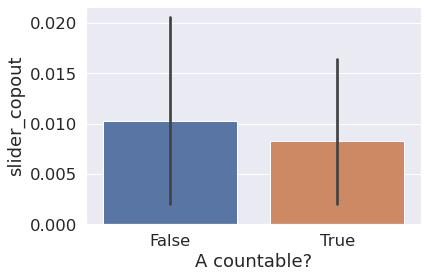

In [61]:
sns.barplot(data=merged_df, x="A countable?", y="slider_copout")

## Item exposure

In [62]:
merged_df.groupby(["item_id", "A", "agent_is_given", "agent_is_subject"]).size().sort_values().head(20)

item_id  A             agent_is_given  agent_is_subject
58.0     anticipation  True            True                 6
                                       False                8
18.0     birds         True            False                8
19.0     bubbles       True            True                 9
17.0     debris        False           False                9
39.0     sewage        False           False               10
6.0      terror        False           False               10
8.0      cockroaches   False           False               10
30.0     fear          False           False               10
8.0      cockroaches   True            True                11
20.0     fireflies     False           False               11
39.0     sewage        True            True                11
64.0     worms         False           True                11
                       True            False               11
41.0     trepidation   True            False               12
19.0     bubbl

## Basic visualization: givenness manipulation

In [63]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "AV", "A concrete?", "A countable?", "agent_is_given"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

In [64]:
item_differences.sort_values()

item_id  A             V        L           AV                  A concrete?  A countable?  agent_is_given
25.0     energy        humm     market      energy humm         False        False         False            -0.271957
7.0      excitement    crackl   theater     excitement crackl   False        False         False            -0.268981
4.0      people        bustl    square      people bustl        True         True          True             -0.136268
58.0     anticipation  tingl    arms        anticipation tingl  False        False         True             -0.135840
41.0     trepidation   shak     chest       trepidation shak    False        False         False            -0.085743
4.0      people        bustl    square      people bustl        True         True          False            -0.011858
22.0     lights        glow     sky         lights glow         True         True          True             -0.005426
                                                                    

<AxesSubplot:xlabel='agent_is_given', ylabel='LocationSubject - AgentSubject'>

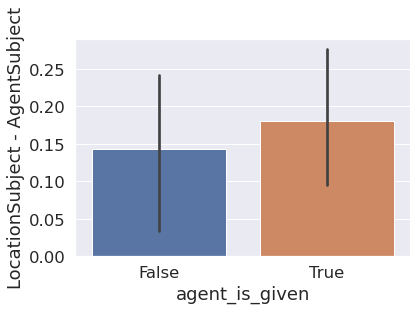

In [65]:
sns.barplot(data=item_differences.reset_index(), x="agent_is_given", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='agent_is_subject', ylabel='slider_value_normed'>

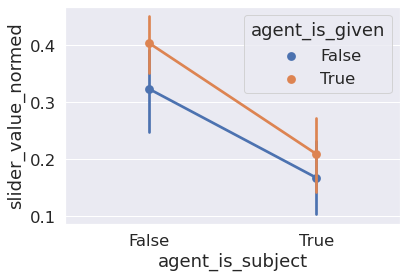

In [66]:
sns.pointplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

<AxesSubplot:xlabel='Construction', ylabel='Normalized slider response'>

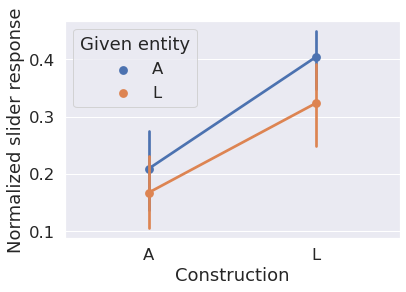

In [67]:
to_plot = merged_df.copy()
to_plot["Construction"] = to_plot.agent_is_subject.map({False: "L", True: "A"})
to_plot["Given entity"] = to_plot.agent_is_given.map({False: "L", True: "A"})
to_plot["Normalized slider response"] = to_plot.slider_value_normed
sns.pointplot(data=to_plot.reset_index(), x="Construction", y="Normalized slider response", hue="Given entity")

In [68]:
ttest_ind(merged_df[merged_df.agent_is_given & ~merged_df.agent_is_subject & ~merged_df.slider_copout].slider_value_normed,
          merged_df[~merged_df.agent_is_given & ~merged_df.agent_is_subject & ~merged_df.slider_copout].slider_value_normed)

Ttest_indResult(statistic=1.794806091301085, pvalue=0.07334099330944638)

<AxesSubplot:xlabel='agent_is_subject', ylabel='slider_value_normed'>

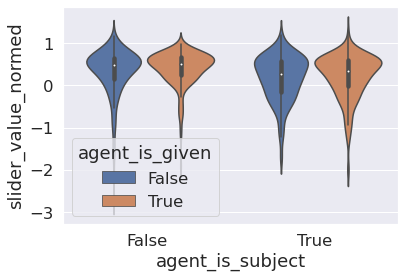

In [69]:
sns.violinplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

In [70]:
merged_df.groupby(["agent_is_subject", "agent_is_given"]).slider_value_normed.agg(["mean", "std"])

mean       std
agent_is_subject agent_is_given                    
False            False           0.323474  0.551040
                 True            0.403931  0.402185
True             False           0.167493  0.538083
                 True            0.209162  0.521262

In [71]:
merged_df.groupby(["agent_is_subject", "agent_is_given"]).slider_value.agg(["mean", "std", "sem"])

mean        std       sem
agent_is_subject agent_is_given                                
False            False           78.179039  20.038084  1.324154
                 True            80.390558  16.020388  1.049531
True             False           71.291667  20.943391  1.288977
                 True            74.291139  20.251691  1.315489

### Split by concreteness

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

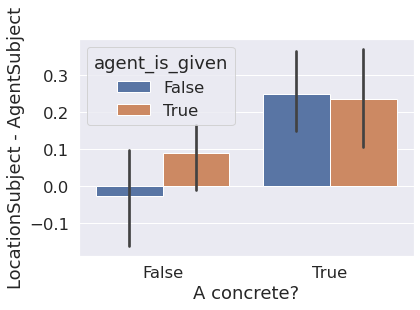

In [72]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject", hue="agent_is_given")

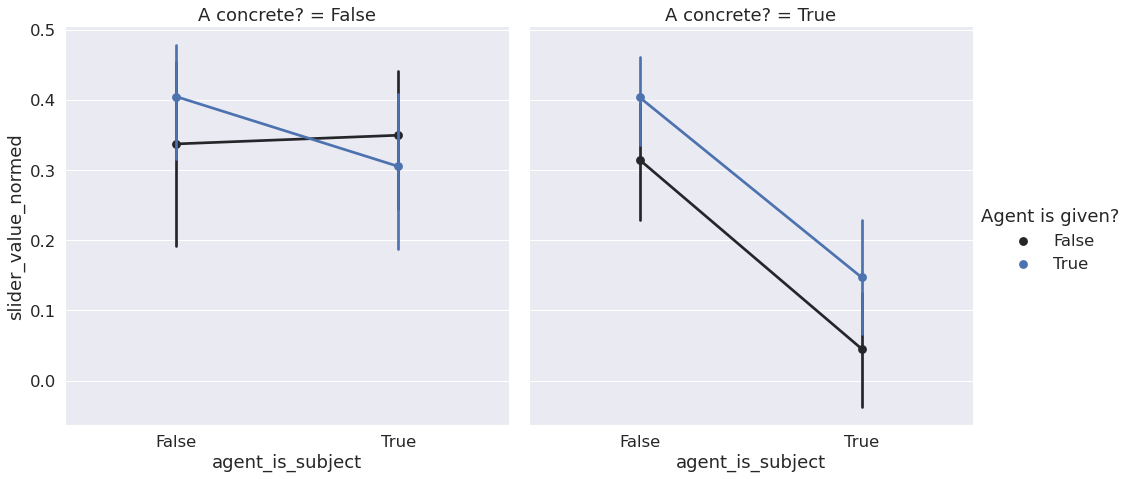

In [73]:
g = sns.FacetGrid(data=merged_df.reset_index(), col="A concrete?", height=7)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True]).add_legend(title="Agent is given?")

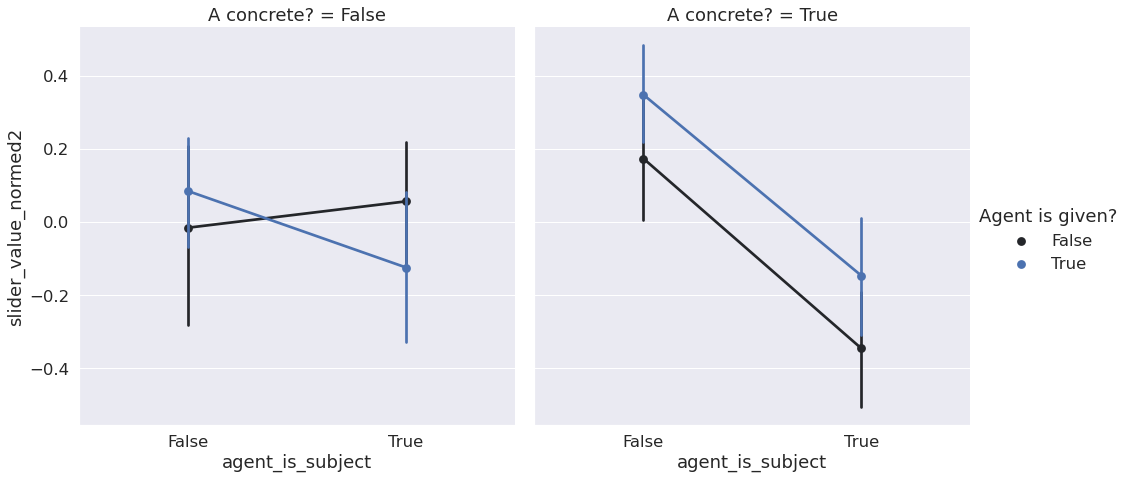

In [74]:
graphdf = merged_df.copy()
graphdf["slider_value_normed2"] = graphdf.groupby('item_id').slider_value_normed.transform(lambda xs: (xs - xs.mean()) / xs.std())
g = sns.FacetGrid(data=graphdf.reset_index(), col="A concrete?", height=7)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed2", "agent_is_given", order=[False, True], hue_order=[False, True]).add_legend(title="Agent is given?")

In [75]:
merged_df.groupby("A concrete?").apply(
    lambda rows: ttest_ind(rows[rows.agent_is_given & ~rows.agent_is_subject & ~rows.slider_copout].slider_value_normed,
                           rows[~rows.agent_is_given & ~rows.agent_is_subject & ~rows.slider_copout].slider_value_normed))

A concrete?
False    (0.8266677254896803, 0.4095707309811075)
True     (1.689156254550527, 0.09227931804024787)
dtype: object

In [76]:
merged_df.groupby(["A concrete?", "agent_is_subject"]).apply(
    lambda rows: ttest_ind(rows[rows.agent_is_given & ~rows.slider_copout].slider_value_normed,
                           rows[~rows.agent_is_given & ~rows.slider_copout].slider_value_normed))

A concrete?  agent_is_subject
False        False                (0.8266677254896803, 0.4095707309811075)
             True                (-0.5865794861662708, 0.5581577112297831)
True         False                (1.689156254550527, 0.09227931804024787)
             True                (1.7400749407058858, 0.08287132498633294)
dtype: object

### Split by item

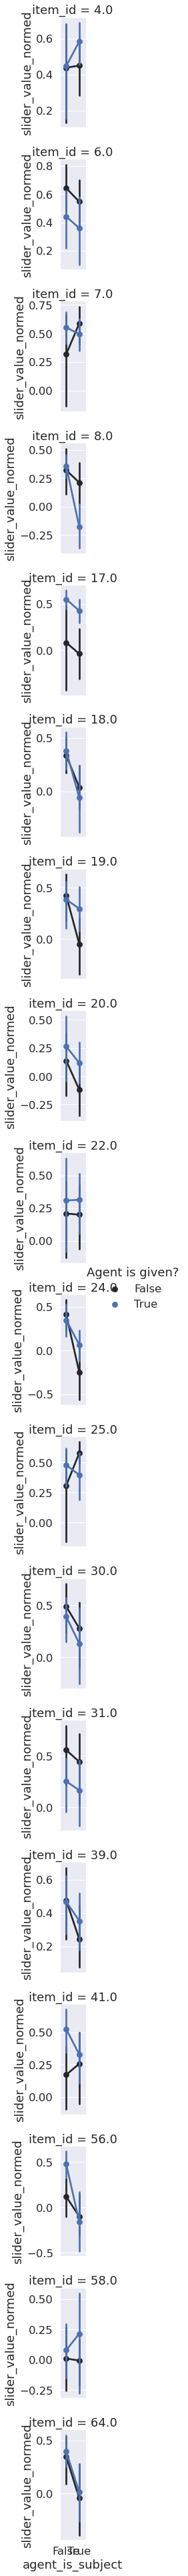

In [77]:
g = sns.FacetGrid(data=merged_df.reset_index(), row="item_id", sharey=False)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True])
g.add_legend(title="Agent is given?")
# sns.pointplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'frogs hopp'),
  Text(1, 0, 'debris flow'),
  Text(2, 0, 'tadpoles swimm'),
  Text(3, 0, 'worms wriggl'),
  Text(4, 0, 'bubbles foam'),
  Text(5, 0, 'fireflies glimmer'),
  Text(6, 0, 'birds flutter'),
  Text(7, 0, 'trepidation shak'),
  Text(8, 0, 'sewage runn'),
  Text(9, 0, 'cockroaches creep'),
  Text(10, 0, 'fear prickl'),
  Text(11, 0, 'lights glow'),
  Text(12, 0, 'anticipation tingl'),
  Text(13, 0, 'people bustl'),
  Text(14, 0, 'excitement crackl'),
  Text(15, 0, 'energy humm'),
  Text(16, 0, 'terror cours'),
  Text(17, 0, 'excitement puls')])

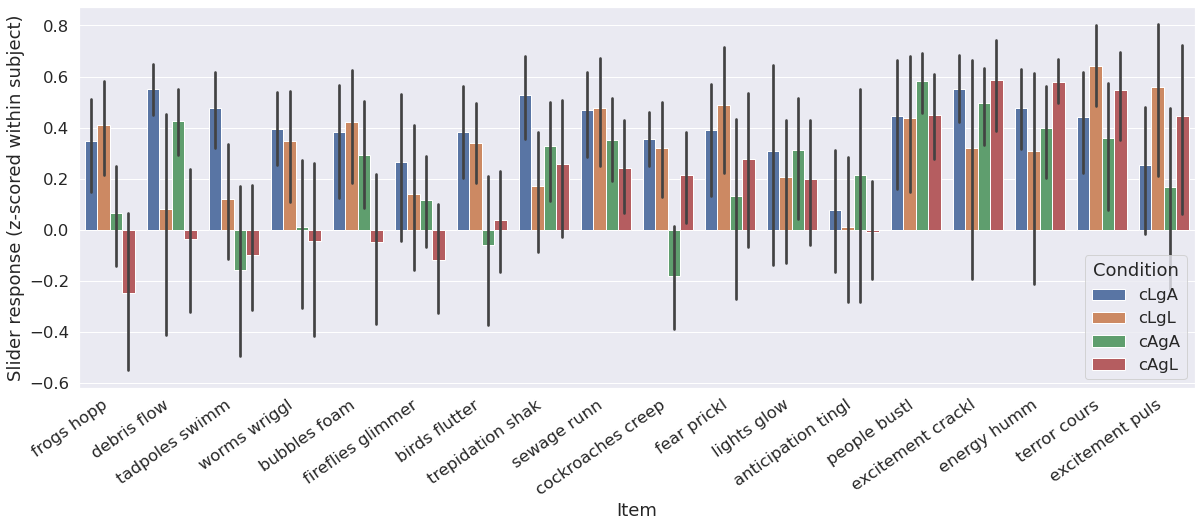

In [78]:
plt.subplots(figsize=(20, 7))
to_plot = merged_df.copy()
to_plot["c"] = to_plot.agent_is_subject.map({False: "L", True: "A"})
to_plot["g"] = to_plot.agent_is_given.map({False: "L", True: "A"})
to_plot["Condition"] = "c" + to_plot.c.str.cat("g" + to_plot.g)

order = to_plot.groupby("AV").apply(lambda xs: xs[xs.Condition == "cLgA"].slider_value_normed.mean() - xs[xs.Condition == "cAgL"].slider_value_normed.mean()).sort_values(ascending=False).index

column_mappings = {
    "slider_value_normed": "Slider response (z-scored within subject)",
    "AV": "Item"
}

sns.barplot(data=to_plot.rename(columns=column_mappings),
            x=column_mappings["AV"], hue="Condition", y=column_mappings["slider_value_normed"], order=order, hue_order=["cLgA", "cLgL", "cAgA", "cAgL"])
plt.xticks(rotation=35, ha="right")

## Extras

In [79]:
pd.merge(response_df.xs("A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX", level="uniqueid").reset_index()[["trial_index", "materials_id", "item_id", "condition_0", "condition_1", "agent_is_subject", "slider_value"]],
         materials_df[["A", "V", "L"]],
         left_on=["materials_id", "item_id"], right_index=True).sort_values("agent_is_subject")

KeyError: 'A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX'

In [ ]:
exp_items[(exp_items.condition_0 != "filler") & (exp_items.item_id == 3)][["agent_is_subject", "slider_value_normed"]].sort_values(["agent_is_subject", "slider_value_normed"])